<h1 align='center'>  Máquinas de Soporte Vectorial </h1> 

## Introducción

Máquinas de Vector Soporte (Vector Support Machines, SVMs) es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

Las Máquinas de Vector Soporte se fundamentan en el Maximal Margin Classifier, que a su vez, se basa en el concepto de hiperplano. A lo largo de este documento se introducen por orden cada uno de estos conceptos. Comprender los fundamentos de las SVMs requiere de conocimientos sólidos en álgebra lineal y optimización. En este documento no se profundiza en el aspecto matemático, pero puede encontrarse una descripción detallada en el libro Support Vector Machines Succinctly by Alexandre Kowalczyk.

El Support Vector Classifier descrito en los apartados anteriores consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es, su capacidad decae drásticamente. Una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

Debido a la utilización de kernels, en el ajuste de un SVM participa una matriz n x n, donde n es el número de observaciones de entrenamiento. Por esta razón, lo que más influye en el tiempo de computación necesario para entrenar un SVM es el número de observaciones, no el de predictores

## Aumento de la dimensión: kernels

Una vez definido que las Máquinas de Vector Soporte siguen la misma estratégica que el Support Vector Classifier, pero aumentando la dimensión de los datos antes de aplicar el algoritmo, la pregunta inmediata es ¿Cómo se aumenta la dimensión y qué dimensión es la correcta?

La dimensión de un conjunto de datos puede transformarse combinando o modificando cualquiera de sus dimensiones. Por ejemplo, se puede transformar un espacio de dos dimensiones en uno de tres aplicando la siguiente función:

f(x1,x2)=(x21,2–√x1x2,x22)
 
Esta es solo una de las infinitas transformaciones posibles, ¿Cómo saber cuál es la adecuada? Es aquí donde el concepto de kernel entra en juego. Un kernel (K) es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un producto escalar. Si se sustituye este producto escalar por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como kernel trickporque, con solo una ligera modificación del problema original, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:


**Kernel lineal**

K(x,x')=x⋅x'
 
Si se emplea un Kernel lineal, el clasificador Support Vector Machine obtenido es equivalente al Support Vector Classifier.

**Kernel polinómico**

K(x,x')=(x⋅x'+c)d
 
Cuando se emplea  d=1  y  c=0 , el resultado es el mismo que el de un kernel lineal. Si  d>1 , se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta  d . No suele ser recomendable emplear valores de  d  mayores 5 por problemas de overfitting.


**Gaussian Kernel (RBF)**

K(x,x')=exp(−γ||x−x'||2)
 
El valor de  γ  controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.


## Clasificación multi-clase


El concepto de hiperplano de separación en el que se basan los SVMs no se generaliza de forma natural para más de dos clases. Se han desarrollado numerosas estrategias con el fin de aplicar este algoritmo a problemas multiclase, de entre ellos, los más empleados son: one-versus-one, one-versus-all y DAGSVM.

#### One-versus-one


Supóngase un escenario en el que hay K > 2 clases y que se quiere aplicar el método de clasificación basado en SVMs. La estrategia de one-versus-one consiste en generar un total de K(K-1)/2 SVMs, comparando todos los posibles pares de clases. Para generar una predicción, se emplean cada uno de los K(K-1)/2 clasificadores, registrando el número de veces que la observación es asignada a cada una de las clases. Finalmente, se considera que la observación pertenece a la clase a la que ha sido asignada con más frecuencia. La principal desventaja de esta estrategia es que el número de modelos necesarios se dispara a medida que aumenta el número de clases, por lo que no es aplicable en todos los escenarios.


#### One-versus-all


Esta estrategia consiste en ajustar K SVMs distintos, cada uno comparando una de las K clases frente a las restantes K-1 clases. Como resultado, se obtiene un hiperplano de clasificación para cada clase. Para obtener una predicción, se emplean cada uno de los K clasificadores y se asigna la observación a la clase para la que la predicción resulte positiva. Esta aproximación, aunque sencilla, puede causar inconsistencias, ya que puede ocurrir que más de un clasificador resulte positivo, asignando así una misma observación a diferentes clases. Otro inconveniente adicional es que cada clasificador se entrena de forma no balanceada. Por ejemplo, si el set de datos contiene 100 clases con 10 observaciones por clase, cada clasificador se ajusta con 10 observaciones positivas y 990 negativas.


#### DAGSVM


DAGSVM (Directed Acyclic Graph SVM) es una mejora del método one-versus-one. La estrategia seguida es la misma, pero consiguen reducir su tiempo de ejecución eliminando comparaciones innecesarias gracias al empleo de una directed acyclic graph (DAG). Supóngase un set de datos con cuatro clases (A, B, C, D) y 6 clasificadores entrenados con cada posible par de clases (A-B, A-C, A-D, B-C B-D, C-D). Se inician las comparaciones con el clasificador (A-D) y se obtiene como resultado que la observación pertenece a la clase A, o lo que es equivalente, que no pertenece a la clase D. Con esta información se pueden excluir todas las comparaciones que contengan la clase D, puesto que se sabe que no pertenece a este grupo. En la siguiente comparación se emplea el clasificador (A-C) y se predice que es A. Con esta nueva información se excluyen todas las comparaciones que contengan C. Finalmente solo queda emplear el clasificador (A-B) y asignar la observación al resultado devuelto. Siguiendo esta estrategia, en lugar de emplear los 6 clasificadores, solo ha sido necesario emplear 3. DAGSVM tiene las mismas ventajas que el método one-versus-one pero mejorando mucho el rendimiento.

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar los datos requeridos</li>
    <li>2-. Adquirir los datos en un formato accesible</li>
    <li>3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preparar los datos para el modelo de aprendizaje automático</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
    <li>8-. Importancia de los predictores</li>
</ul>

# 2-. Adquisición de datos
Primero, necesitamos algunos datos. Para usar un ejemplo realista, recuperé datos de pacientes del Hospital Herminda Martin de Chillan. En general, aproximadamente el 80 % del tiempo dedicado al análisis de datos es limpiar y recuperar datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad.

In [1]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/bdd_final.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2.012418e+09,11998898.0,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2.000150e+09,12002852.0,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,9.808599e+07,12003092.0,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9.772094e+06,11995391.0,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,9.809511e+07,12014450.0,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [2]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 75 pacientes con 85 variables.


# 3-. Identificación y corrección de los puntos de datos faltantes/anomalías según sea necesario

En este item, la base de datos será rellenada.

## Eliminación las filas de los pacientes que se expulsaron de la BDD

In [3]:
dataframe.drop(dataframe[(dataframe['diag Elopez'] == 'out')].index, inplace=True)
dataframe.head(7)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2.012418e+09,11998898.0,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2.000150e+09,12002852.0,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,9.808599e+07,12003092.0,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9.772094e+06,11995391.0,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,9.809511e+07,12014450.0,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949
5,6,chillan,2225404-81923149,2.000139e+09,12015366.0,90.0,69.0,NaN,si,si,...,1.811635,1.701929,1.322012,0.729734,0.776773,4.897850,0.048574,-1.313598,-0.725090,-0.771829
7,8,chillan,56010835-91599074,2.000149e+09,12032742.0,90.0,NaN,NaN,si,no,...,2.415599,2.081507,1.787319,0.739907,0.858666,13.519904,0.122450,-0.912042,-0.377564,-0.438164


In [4]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 46 pacientes con 85 variables.


## Variables signaificativas para la investigación

### SOBRE EL DATASET

>**HTA**: ```"si" o "no"```

>**DIABETES**: ```"si" o "no"```

>**EDAD**: ```Edad del paciente```

>**GLUCOSA**: ```Nivel de azucar en la sangre```

>**COL. TOTAL**: ```Cantidad de Colesterol en la sangre```

>**TRIGLICERIDOS**: ```Cantidad de trigliceridos en la sangre```

>**INR**: ```Índice internacional normalizado (INR, por sus siglas en inglés) es un tipo de cálculo que se basa en los resultados de las pruebas de tiempo de protrombina```

>**CONTEO G.B.**: ```Conteo de globulos blancos en la sangre```

>**GLASGOW AL INICO ACV**: ```Escala de 15 puntos medica que es para medir el estado de conciencia. Esta pertence a la Inicial```

>**NIHSS INICO ACV**: ```Escala de 42 puntos más empleada para la valoración de funciones neurológicas básicas en la fase aguda del ictus isquémico, tanto al inicio como durante su evolución. Esta pertence a la Inicial```

>**NIHSS alta ACV**: ```Pertenece cuando es dado de alta el paciente```

In [5]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'EDAD', 'GLUCOSA', 'COL. TOTAL', 'TRIGLICERIDOS', 'INR', 'CONTEO G.B.', 'GLASGOW AL INICO ACV', 'NIHSS INICO ACV', 'NIHSS alta ACV']
dataset = dataframe[[*columnasMuestra]]

### Descripción general de los datos


In [6]:
# Check Dataset:

def check_data(dataframe,head=5):
    print(20*"-" + "Información".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Forma de datos".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "Los primeros 5 datos".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "Los últimos 5 datos".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Data".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describir los datos".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(dataset)

--------------------    Información     --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HTA                   42 non-null     object 
 1   DIABETES              34 non-null     object 
 2   EDAD                  44 non-null     float64
 3   GLUCOSA               38 non-null     float64
 4   COL. TOTAL            40 non-null     float64
 5   TRIGLICERIDOS         40 non-null     float64
 6   INR                   37 non-null     float64
 7   CONTEO G.B.           46 non-null     float64
 8   GLASGOW AL INICO ACV  29 non-null     float64
 9   NIHSS INICO ACV       39 non-null     float64
 10  NIHSS alta ACV        32 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.3+ KB
None
--------------------   Forma de datos   --------------------
(46, 11)

--------------------Los primeros 5 datos-----

### Missing data

In [7]:
valores_por_defecto = {
                         'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'EDAD':dataset["EDAD"].median().round(),
                       'GLUCOSA':dataset["GLUCOSA"].median(),
                       'COL. TOTAL':dataset["COL. TOTAL"].median(), 
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].median(),
                       'INR':dataset["INR"].median(),
                       'CONTEO G.B.':dataset["CONTEO G.B."].median(),
                       'GLASGOW AL INICO ACV':dataset["GLASGOW AL INICO ACV"].median().round(),
                       'NIHSS INICO ACV':dataset["NIHSS INICO ACV"].median().round(), 
                       'NIHSS alta ACV':dataset["NIHSS alta ACV"].median().round(), 
                      }
# Missing Data
dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,42.0
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,0.0
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,2.0
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,0.0
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,2.0


In [8]:
print('Existen {} pacientes con {} variables.'.format(*dataset.shape))

Existen 46 pacientes con 11 variables.


In [9]:
# Check Dataset:

def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(dataset)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HTA                   46 non-null     object 
 1   DIABETES              46 non-null     object 
 2   EDAD                  46 non-null     float64
 3   GLUCOSA               46 non-null     float64
 4   COL. TOTAL            46 non-null     float64
 5   TRIGLICERIDOS         46 non-null     float64
 6   INR                   46 non-null     float64
 7   CONTEO G.B.           46 non-null     float64
 8   GLASGOW AL INICO ACV  46 non-null     float64
 9   NIHSS INICO ACV       46 non-null     float64
 10  NIHSS alta ACV        46 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.3+ KB
None
--------------------     Data Shape     --------------------
(46, 11)

--------------------  The First 5 Data  -----

## Visualización de las variables

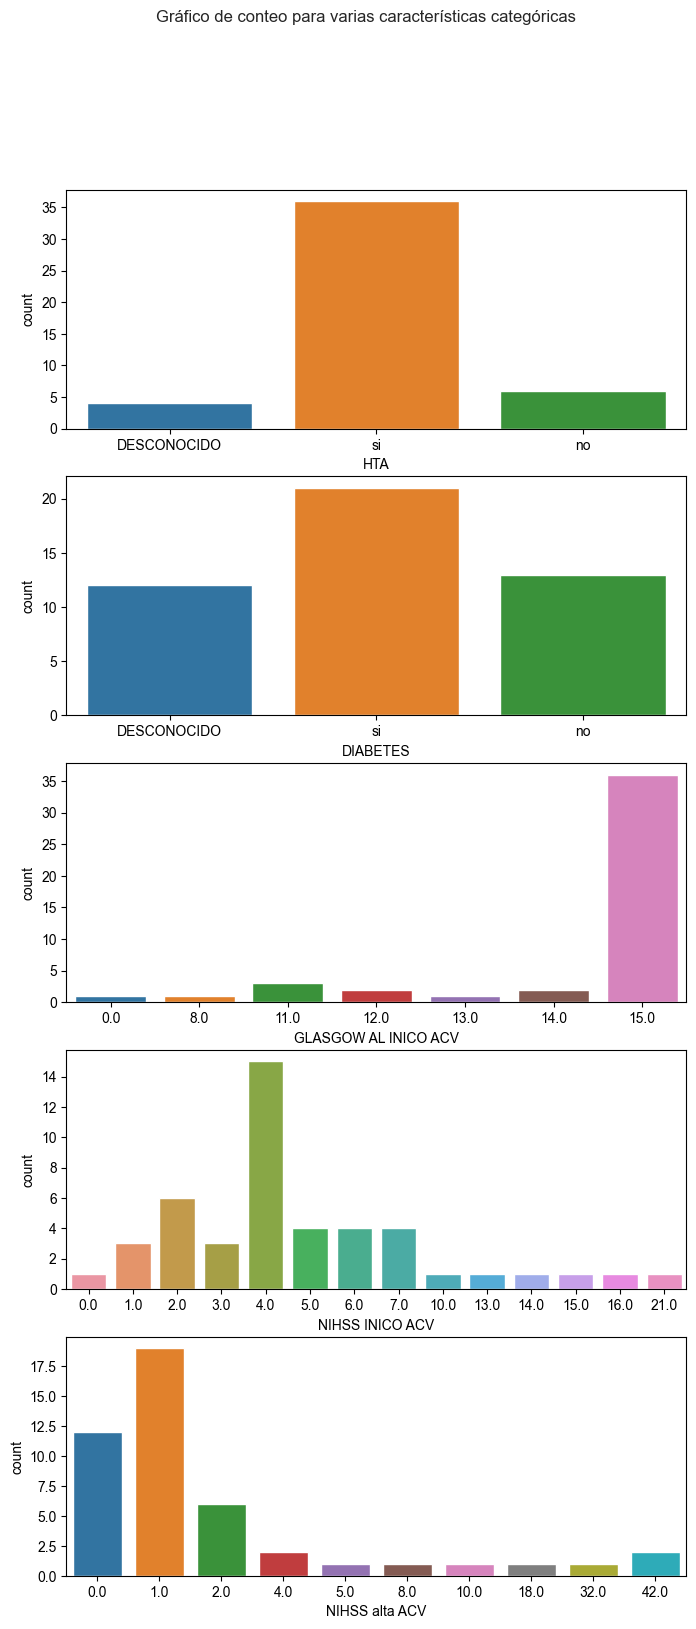

In [10]:
# Para gráficos matpltlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style


fig,axes = plt.subplots(5, figsize = (8, 18))
sns.set_style('darkgrid')
fig.suptitle("Gráfico de conteo para varias características categóricas")

sns.countplot(ax=axes[0],data=dataset,x='HTA')
sns.countplot(ax=axes[1],data=dataset,x='DIABETES')
sns.countplot(ax=axes[2],data=dataset,x='GLASGOW AL INICO ACV')
sns.countplot(ax=axes[3],data=dataset,x='NIHSS INICO ACV')
sns.countplot(ax=axes[4],data=dataset,x='NIHSS alta ACV')

plt.show()

C:\Users\Abraham\AppData\Local\Temp\ipykernel_26560\1091370767.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['EDAD'], bins=30, color='darkred', ax=axes[0, 0])
C:\Users\Abraham\AppData\Local\Temp\ipykernel_26560\1091370767.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[

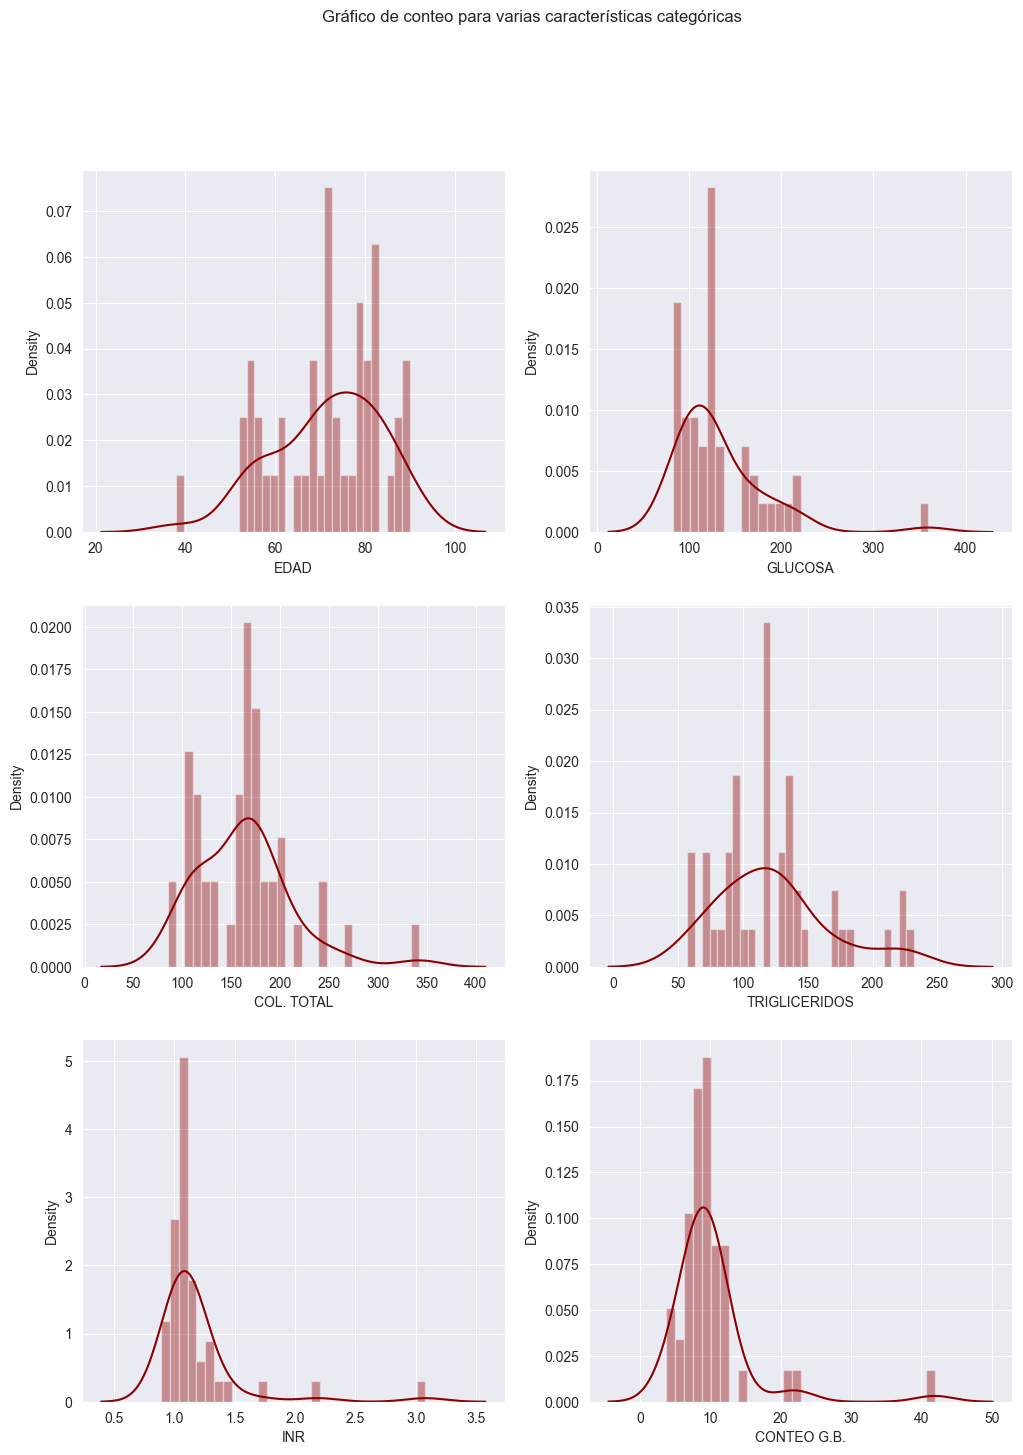

In [11]:
fig,axes = plt.subplots(3, 2, figsize = (12, 16))
sns.set_style('darkgrid')
fig.suptitle("Gráfico de conteo para varias características categóricas")

# Variables muy dispersas
sns.distplot(dataset['EDAD'], bins=30, color='darkred', ax=axes[0, 0])
sns.distplot(dataset['GLUCOSA'], bins=30, color='darkred', ax=axes[0, 1])
sns.distplot(dataset['COL. TOTAL'], bins=30, color='darkred', ax=axes[1, 0])
sns.distplot(dataset['TRIGLICERIDOS'], bins=30, color='darkred', ax=axes[1, 1])
sns.distplot(dataset['INR'], bins=30, color='darkred', ax=axes[2, 0])
sns.distplot(dataset['CONTEO G.B.'], bins=30, color='darkred', ax=axes[2, 1])

plt.show()

### Distibución de Diabetes e Hipertensión

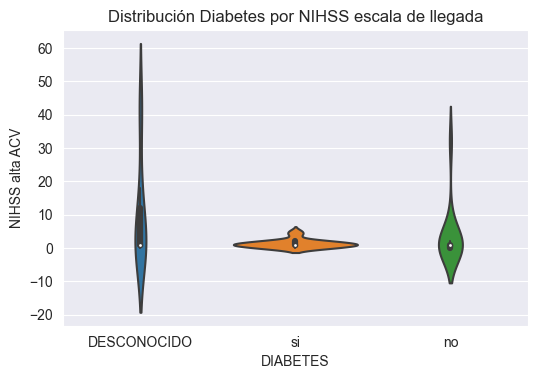

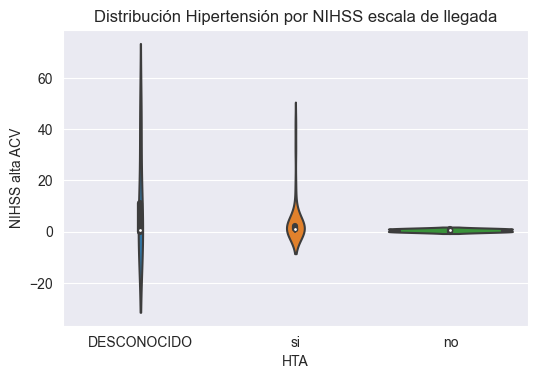

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'DIABETES',
        y     = 'NIHSS alta ACV',
        data  = dataset,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución Diabetes por NIHSS escala de llegada');

fig, ax2 = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'HTA',
        y     = 'NIHSS alta ACV',
        data  = dataset,
        #color = "white",
        ax    = ax2
    )

ax2.set_title('Distribución Hipertensión por NIHSS escala de llegada');

### Mapa de calor de variables numéricas

C:\Users\Abraham\AppData\Local\Temp\ipykernel_26560\2221177336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


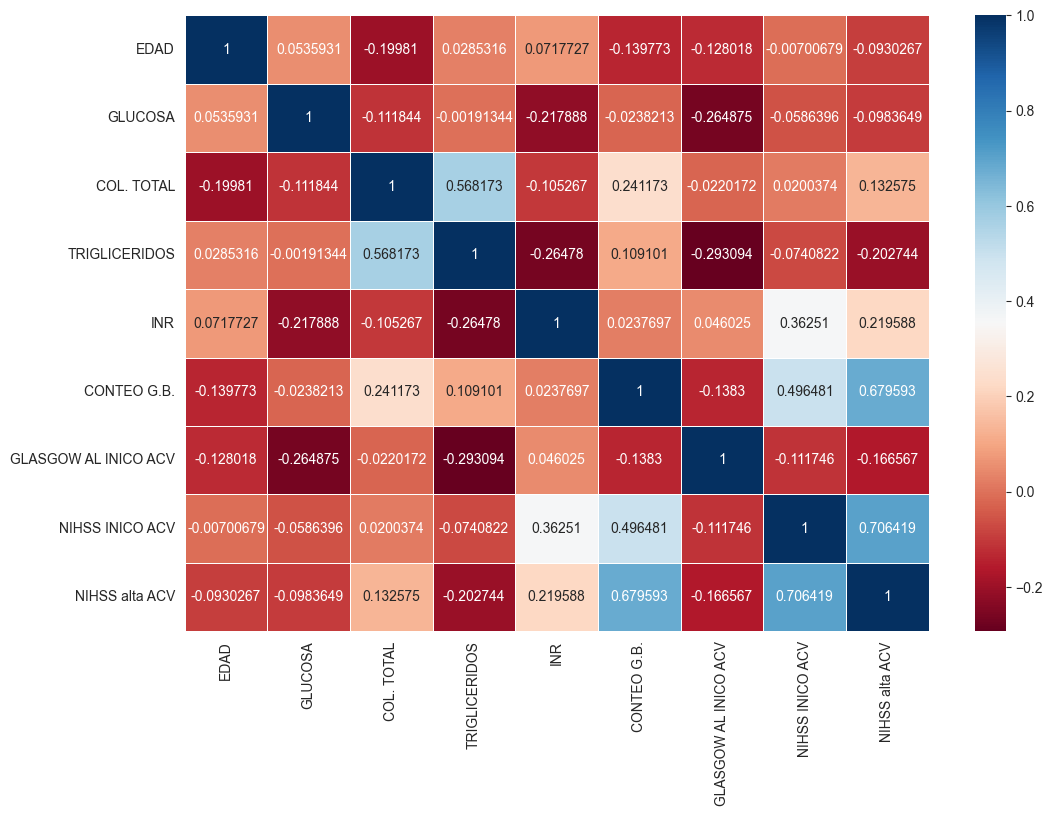

In [13]:
fig = plt.figure(figsize=(12,8))
corr = dataset.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

# 4-. Preprocesar los datos
Preparar los datos para el modelo de aprendizaje automático

## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

## Análisis de datos y clasifiación

Aqui se análizaran los datos a trabajar.

### Análisis de variable Objetivo
Variable más importante que nos interesa tener predicción.
 
#### Número de clase

In [14]:
dataset["NIHSS alta ACV"].value_counts()

1.0     19
0.0     12
2.0      6
42.0     2
4.0      2
8.0      1
10.0     1
18.0     1
32.0     1
5.0      1
Name: NIHSS alta ACV, dtype: int64

### Crear columna para NIHSS_INICO_CLASIFICADOR

Esta columna nos servira para clasificación de los estados de la variable

In [15]:
condicionesALTA = [
    (dataset['NIHSS alta ACV'] == 0),
    (dataset['NIHSS alta ACV'] == 1),
    (dataset['NIHSS alta ACV'] >= 2) & (dataset['NIHSS alta ACV'] <= 5),
    (dataset['NIHSS alta ACV'] >= 6) & (dataset['NIHSS alta ACV'] <= 15),
    (dataset['NIHSS alta ACV'] >= 16) & (dataset['NIHSS alta ACV'] <= 20),
    (dataset['NIHSS alta ACV'] > 20),
]
valoresALTA = ["Sin Déficit", "Déficit Mínimo", "Leve (Trombolisando)", "Moderado (Buen Pronostico)", "Déficit Importante", "Grave"]
dataset['NIHSS_alta_cat'] = np.select(condicionesALTA, valoresALTA)
dataset['NIHSS_alta_cat'].value_counts()

Déficit Mínimo                19
Sin Déficit                   12
Leve (Trombolisando)           9
Grave                          3
Moderado (Buen Pronostico)     2
Déficit Importante             1
Name: NIHSS_alta_cat, dtype: int64

In [16]:
dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV,NIHSS_alta_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,42.0,Grave
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,0.0,Sin Déficit
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,2.0,Leve (Trombolisando)
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,0.0,Sin Déficit
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,2.0,Leve (Trombolisando)


### Crear columna para NIHSS_INICO_ESTABLE_CRITICO

Esta columna nos ayudará a observar si el paciente esta estable o critico. Nos interesa saber el pronostico del paciente, por eso es necesaria una variable binaria sobre el alta del paciente.

In [17]:
dataset['NIHSS_alta_ESTABLE_O_GRAVE'] = np.where(dataframe['NIHSS alta ACV'] <=6, 0, 1)

dataset['NIHSS_alta_ESTABLE_O_GRAVE'].value_counts()


0    26
1    20
Name: NIHSS_alta_ESTABLE_O_GRAVE, dtype: int64

In [18]:
round(dataset.describe(), 2)

,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV,NIHSS_alta_ESTABLE_O_GRAVE
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,71.54,132.83,162.78,122.87,1.18,10.12,14.04,5.33,4.26,0.43
std,12.03,50.19,48.77,43.46,0.36,5.91,2.60,4.26,9.78,0.50
min,38.00,82.61,85.00,57.00,0.89,3.76,0.00,0.00,0.00,0.00
25%,62.75,101.06,121.00,93.00,1.03,7.82,15.00,3.00,0.25,0.00
50%,72.00,120.00,163.00,119.00,1.09,9.30,15.00,4.00,1.00,0.00
75%,80.00,154.98,182.50,137.00,1.15,10.38,15.00,6.00,2.00,1.00
max,90.00,359.42,342.00,232.00,3.08,41.90,15.00,21.00,42.00,1.00


### Análisis de las las Escalas de INICIO del ACV

In [19]:
# Análisis NIHSS INICO ACV

print(f'NIHSS INICO ACV Variable min: {dataset["NIHSS INICO ACV"].min()}')
print(f'NIHSS INICO ACV Variable max: {dataset["NIHSS INICO ACV"].max()}')
print(f'NIHSS INICO ACV Variable: {dataset["NIHSS INICO ACV"].nunique()}')

NIHSS INICO ACV Variable min: 0.0
NIHSS INICO ACV Variable max: 21.0
NIHSS INICO ACV Variable: 14


In [20]:
# Realizamos la clasificación de la escala

condicionesINICIO = [
    (dataset['NIHSS INICO ACV'] == 0),
    (dataset['NIHSS INICO ACV'] == 1),
    (dataset['NIHSS INICO ACV'] >= 2) & (dataset['NIHSS INICO ACV'] <= 5),
    (dataset['NIHSS INICO ACV'] >= 6) & (dataset['NIHSS INICO ACV'] <= 15),
    (dataset['NIHSS INICO ACV'] >= 16) & (dataset['NIHSS INICO ACV'] <= 20),
    (dataset['NIHSS INICO ACV'] > 20),
]
valoresINICIO = ["Sin Déficit", "Déficit Mínimo", "Leve (Trombolisando)", "Moderado (Buen Pronostico)", "Déficit Importante", "Grave"]
dataset['NIHSS_INICIO_cat'] = np.select(condicionesINICIO, valoresINICIO)
dataset['NIHSS_INICIO_cat'].value_counts()

Leve (Trombolisando)          28
Moderado (Buen Pronostico)    12
Déficit Mínimo                 3
Grave                          1
Déficit Importante             1
Sin Déficit                    1
Name: NIHSS_INICIO_cat, dtype: int64

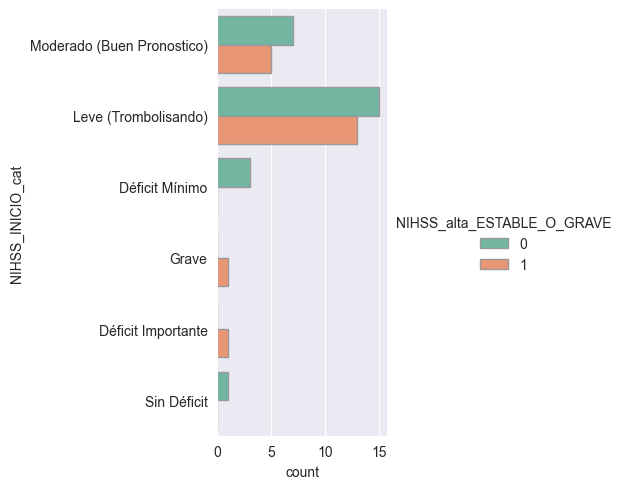

In [21]:
sns.catplot(y="NIHSS_INICIO_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [22]:
# Análisis GLASGOW AL INICO ACV

print(f'GLASGOW AL INICO ACV Variable min: {dataset["GLASGOW AL INICO ACV"].min()}')
print(f'GLASGOW AL INICO ACV Variable max: {dataset["GLASGOW AL INICO ACV"].max()}')
print(f'GLASGOW AL INICO ACV Variable: {dataset["GLASGOW AL INICO ACV"].nunique()}')

GLASGOW AL INICO ACV Variable min: 0.0
GLASGOW AL INICO ACV Variable max: 15.0
GLASGOW AL INICO ACV Variable: 7


In [23]:
dataset['GLASGOW_cat'] = pd.cut(dataset['GLASGOW AL INICO ACV'], bins=[-1, 8, 12, 15], labels=['Grave', 'Moderado', 'Leve'])

dataset['GLASGOW_cat'].unique()

['Moderado', 'Leve', 'Grave']
Categories (3, object): ['Grave' < 'Moderado' < 'Leve']

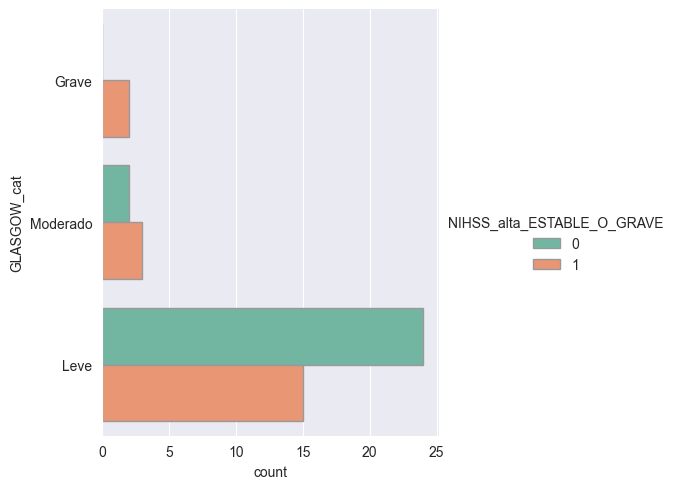

In [24]:
sns.catplot(y="GLASGOW_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

### Análisis de variables de médicas

In [25]:
# Análisis CONTEO G.B.

print(f'CONTEO G.B. Variable min: {dataset["CONTEO G.B."].min()}')
print(f'CONTEO G.B. Variable max: {dataset["CONTEO G.B."].max()}')
print(f'CONTEO G.B. Variable: {dataset["CONTEO G.B."].nunique()}')

CONTEO G.B. Variable min: 3.76
CONTEO G.B. Variable max: 41.9
CONTEO G.B. Variable: 38


In [26]:
dataset['CONTEO G.B._cat'] = pd.cut(dataset['CONTEO G.B.'], bins=[0, 4.5, 10,1000], labels=['Bajo', 'Normal', 'Alto'])

dataset['CONTEO G.B._cat'].unique()

['Alto', 'Normal', 'Bajo']
Categories (3, object): ['Bajo' < 'Normal' < 'Alto']

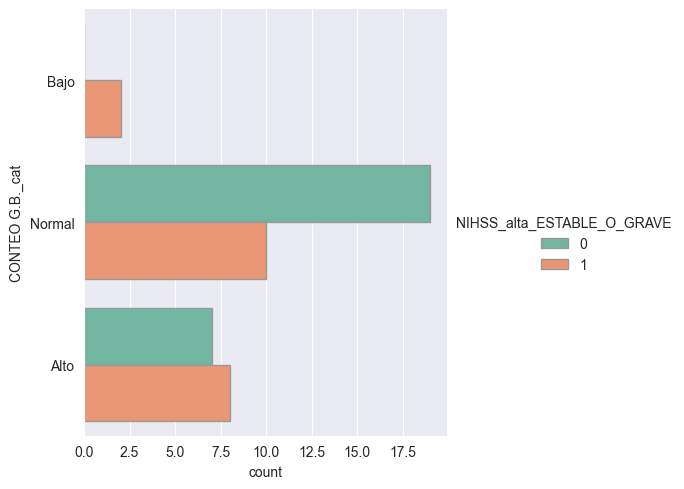

In [27]:
sns.catplot(y="CONTEO G.B._cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [28]:
# Análisis INR

print(f'INR Variable min: {dataset["INR"].min()}')
print(f'INR Variable max: {dataset["INR"].max()}')
print(f'INR Variable: {dataset["INR"].nunique()}')

INR Variable min: 0.89
INR Variable max: 3.08
INR Variable: 26


In [29]:
dataset['INR_cat'] = pd.cut(dataset['INR'], bins=[0.0, 2, 4,1000], labels=['Riesgo', 'Normal', 'No Anticoagula'])

dataset['INR_cat'].unique()

['Riesgo', 'Normal']
Categories (3, object): ['Riesgo' < 'Normal' < 'No Anticoagula']

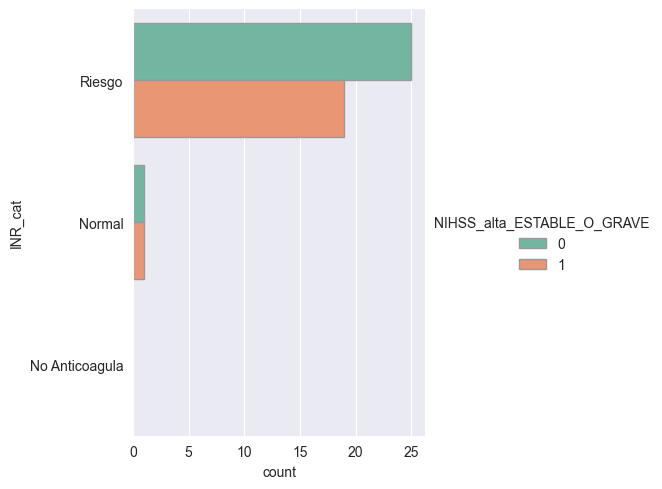

In [30]:
sns.catplot(y="INR_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [31]:
# Análisis TRIGLICERIDOS

print(f'TRIGLICERIDOS Variable min: {dataset["TRIGLICERIDOS"].min()}')
print(f'TRIGLICERIDOS Variable max: {dataset["TRIGLICERIDOS"].max()}')
print(f'TRIGLICERIDOS Variable: {dataset["TRIGLICERIDOS"].nunique()}')

TRIGLICERIDOS Variable min: 57.0
TRIGLICERIDOS Variable max: 232.0
TRIGLICERIDOS Variable: 31


In [32]:
dataset['TRIGLICERIDOS_cat'] = pd.cut(dataset['TRIGLICERIDOS'], bins=[0, 150, 200, 500, 10000], labels=['Normal', 'Límite alto', 'Alto', 'Muy Alto'])

dataset['TRIGLICERIDOS_cat'].unique()

['Normal', 'Límite alto', 'Alto']
Categories (4, object): ['Normal' < 'Límite alto' < 'Alto' < 'Muy Alto']

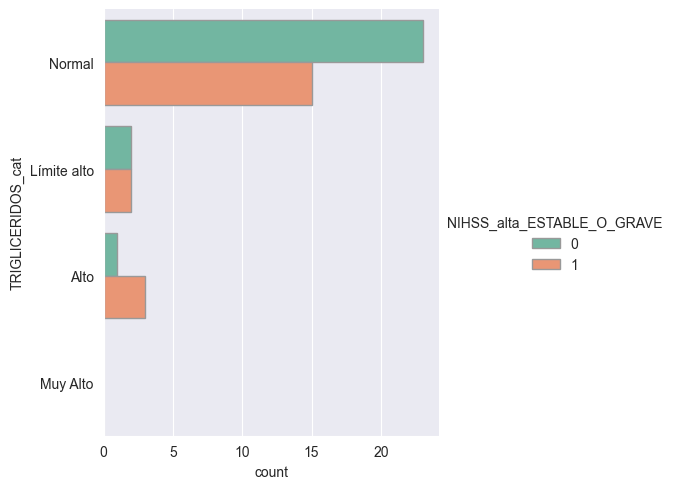

In [33]:
sns.catplot(y="TRIGLICERIDOS_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [34]:
# Análisis COL. TOTAL

print(f'COL. TOTAL Variable min: {dataset["COL. TOTAL"].min()}')
print(f'COL. TOTAL Variable max: {dataset["COL. TOTAL"].max()}')
print(f'COL. TOTAL Variable: {dataset["COL. TOTAL"].nunique()}')

COL. TOTAL Variable min: 85.0
COL. TOTAL Variable max: 342.0
COL. TOTAL Variable: 34


In [35]:
dataset['COL. TOTAL_cat'] = pd.cut(dataset['COL. TOTAL'], bins=[0, 150, 400, 1000, 100000], labels=['Normal', 'Límite alto', 'Alto', 'Muy Alto'])

dataset['COL. TOTAL_cat'].unique()

['Límite alto', 'Normal']
Categories (4, object): ['Normal' < 'Límite alto' < 'Alto' < 'Muy Alto']

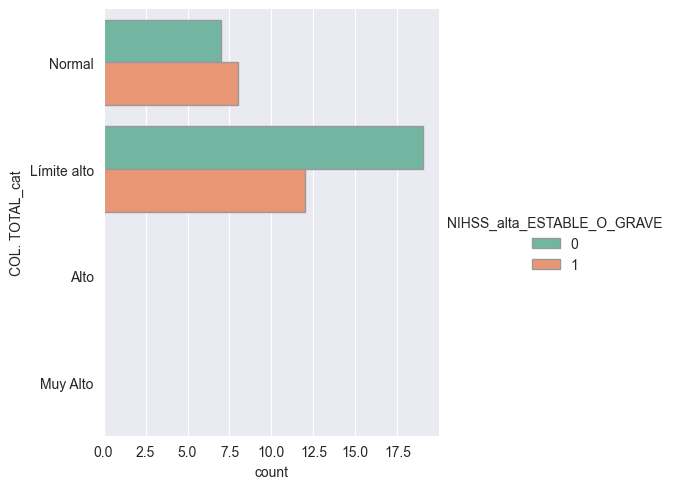

In [36]:
sns.catplot(y="COL. TOTAL_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [37]:
# Análisis EDAD

print(f'GLUCOSA Variable min: {dataset["GLUCOSA"].min()}')
print(f'GLUCOSA Variable max: {dataset["GLUCOSA"].max()}')
print(f'GLUCOSA Variable: {dataset["GLUCOSA"].nunique()}')

GLUCOSA Variable min: 82.61
GLUCOSA Variable max: 359.42
GLUCOSA Variable: 39


In [38]:
dataset['GLUCOSA_cat'] = pd.cut(dataset['GLUCOSA'], bins=[0, 90, 160, 230, 3000], labels=['Bajo', 'Normal', 'Alto', 'Muy Alto'])

dataset['GLUCOSA_cat'].unique()

['Normal', 'Muy Alto', 'Alto', 'Bajo']
Categories (4, object): ['Bajo' < 'Normal' < 'Alto' < 'Muy Alto']

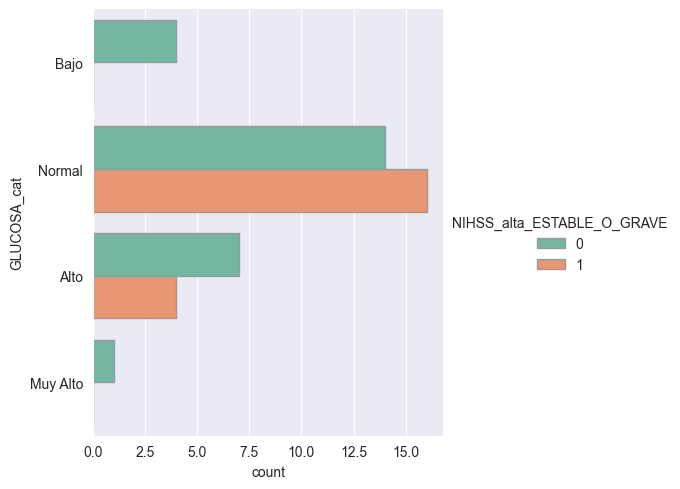

In [39]:
sns.catplot(y="GLUCOSA_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [40]:
# Análisis EDAD

print(f'EDAD Variable min: {dataset["EDAD"].min()}')
print(f'EDAD Variable max: {dataset["EDAD"].max()}')
print(f'EDAD Variable: {dataset["EDAD"].nunique()}')

EDAD Variable min: 38.0
EDAD Variable max: 90.0
EDAD Variable: 28


In [41]:
dataset['EDAD_cat'] = pd.cut(dataset['EDAD'], bins=[0, 13, 18, 45, 60, 100], labels=['Niño', 'Adolecente', 'Adulto Joven', 'Adulto', 'Anciano'])

dataset['EDAD_cat'].unique()

['Adulto', 'Anciano', 'Adulto Joven']
Categories (5, object): ['Niño' < 'Adolecente' < 'Adulto Joven' < 'Adulto' < 'Anciano']

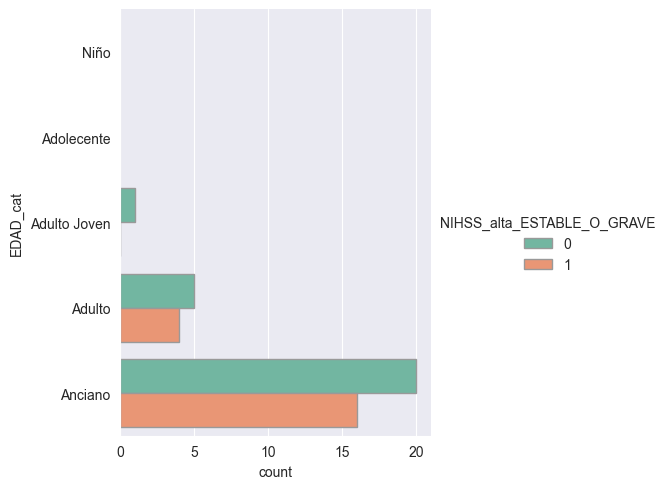

In [42]:
sns.catplot(y="EDAD_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [43]:
# Análisis DIABETES

print(f'DIABETES Variable min: {dataset["DIABETES"].min()}')
print(f'DIABETES Variable max: {dataset["DIABETES"].max()}')
print(f'DIABETES Variable: {dataset["DIABETES"].nunique()}')

DIABETES Variable min: DESCONOCIDO
DIABETES Variable max: si
DIABETES Variable: 3


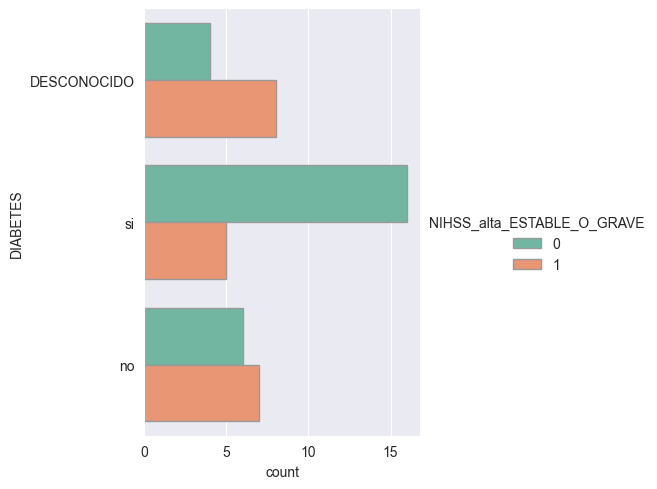

In [44]:
sns.catplot(y="DIABETES", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [45]:
# Análisis DIABETES

print(f'HTA Variable min: {dataset["HTA"].min()}')
print(f'HTA Variable max: {dataset["HTA"].max()}')
print(f'HTA Variable: {dataset["HTA"].nunique()}')

HTA Variable min: DESCONOCIDO
HTA Variable max: si
HTA Variable: 3


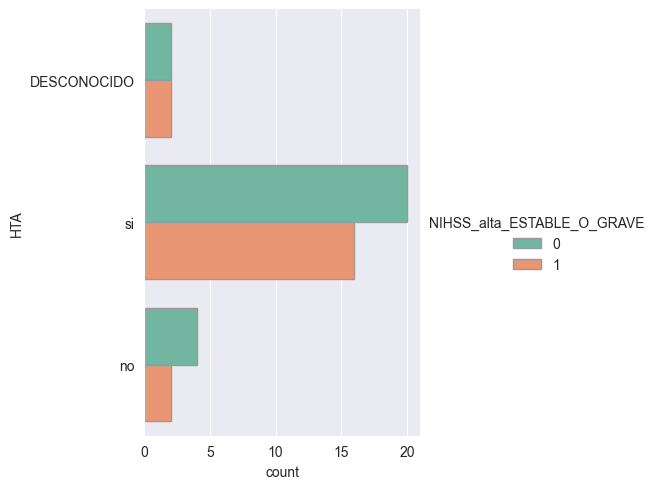

In [46]:
sns.catplot(y="HTA", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [47]:
dataset.head()

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,Grave,1,Moderado (Buen Pronostico),Moderado,Alto,Riesgo,Normal,Límite alto,Normal,Adulto
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,Sin Déficit,0,Moderado (Buen Pronostico),Leve,Normal,Riesgo,Normal,Límite alto,Normal,Adulto
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Normal,Riesgo,Normal,Límite alto,Muy Alto,Anciano
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,Sin Déficit,0,Déficit Mínimo,Leve,Normal,Riesgo,Normal,Límite alto,Alto,Anciano
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Alto,Riesgo,Normal,Límite alto,Alto,Anciano


## Transformación de los datos

## Binary Encoding (Codificación binaria)

Lo que hace este proceso es la transformación de variables de una columna a binario si es posible

In [48]:
binary_cols = [col for col in dataset.columns if dataset[col].dtype not in [int, float]
               and dataset[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols

['INR_cat', 'COL. TOTAL_cat']

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

for col in binary_cols:
    label_encoder(dataset, col)
    
dataset.head()

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,Grave,1,Moderado (Buen Pronostico),Moderado,Alto,1,Normal,0,Normal,Adulto
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,Sin Déficit,0,Moderado (Buen Pronostico),Leve,Normal,1,Normal,0,Normal,Adulto
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Normal,1,Normal,0,Muy Alto,Anciano
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,Sin Déficit,0,Déficit Mínimo,Leve,Normal,1,Normal,0,Alto,Anciano
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Alto,1,Normal,0,Alto,Anciano


## Label Encoding (Codificación de etiquetas)

In [50]:
labelencoder = LabelEncoder()

In [51]:
dataset["NIHSS_alta_cat"] = labelencoder.fit_transform(dataset["NIHSS_alta_cat"])
dataset["GLASGOW_cat"] = labelencoder.fit_transform(dataset["GLASGOW_cat"])
dataset["CONTEO G.B._cat"] = labelencoder.fit_transform(dataset["CONTEO G.B._cat"])
dataset["TRIGLICERIDOS_cat"] = labelencoder.fit_transform(dataset["TRIGLICERIDOS_cat"])
dataset["GLUCOSA_cat"] = labelencoder.fit_transform(dataset["GLUCOSA_cat"])
dataset["EDAD_cat"] = labelencoder.fit_transform(dataset["EDAD_cat"])
dataset["HTA"] = labelencoder.fit_transform(dataset["HTA"])
dataset["DIABETES"] = labelencoder.fit_transform(dataset["DIABETES"])

dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,0,0,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,2,1,Moderado (Buen Pronostico),2,0,1,2,0,3,0
1,2,2,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,5,0,Moderado (Buen Pronostico),1,2,1,2,0,3,0
2,2,2,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,3,0,Leve (Trombolisando),1,2,1,2,0,2,2
3,2,2,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,5,0,Déficit Mínimo,1,2,1,2,0,0,2
4,2,2,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,3,0,Leve (Trombolisando),1,0,1,2,0,0,2


## One-Hot Encoding:

In [52]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)


# Como son muchas columnas, muestro todas
pd.options.display.max_columns = 0

dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat,NIHSS_INICIO_cat_Déficit Importante,NIHSS_INICIO_cat_Déficit Mínimo,NIHSS_INICIO_cat_Grave,NIHSS_INICIO_cat_Leve (Trombolisando),NIHSS_INICIO_cat_Moderado (Buen Pronostico),NIHSS_INICIO_cat_Sin Déficit
0,0,0,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,42.0,2,1,2,0,1,2,0,3,0,0,0,0,0,1,0
1,2,2,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,0.0,5,0,1,2,1,2,0,3,0,0,0,0,0,1,0
2,2,2,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,2.0,3,0,1,2,1,2,0,2,2,0,0,0,1,0,0
3,2,2,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,0.0,5,0,1,2,1,2,0,0,2,0,1,0,0,0,0
4,2,2,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,2.0,3,0,1,0,1,2,0,0,2,0,0,0,1,0,0


# Modelo de Machine Learning

<h1 align='center'>  Máquinas de Soporte Vectorial </h1> 

# 5-. Entrenar el modelo en los datos de entrenamiento

In [53]:
# variables objetivo e independientes:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_alta_ESTABLE_O_GRAVE', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_alta_ESTABLE_O_GRAVE']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

## Creamos el modelo y entrenamos

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Creamos el modelo SVM
svm = SVC(kernel = 'linear', random_state=0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# 6-. Predicciones sobre los datos de prueba y metricas de rendimiento
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [66]:
# Predicción Entrenamiento 
prediccionEntreno = svm.predict(X_train)

# Predicción Tests
prediccionTests = svm.predict(X_test)

# Fase de Entrenamiento

In [67]:
from sklearn import metrics

print("Entrenamiento - Presición :", metrics.accuracy_score(y_train, prediccionEntreno))
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Presición : 1.0
Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

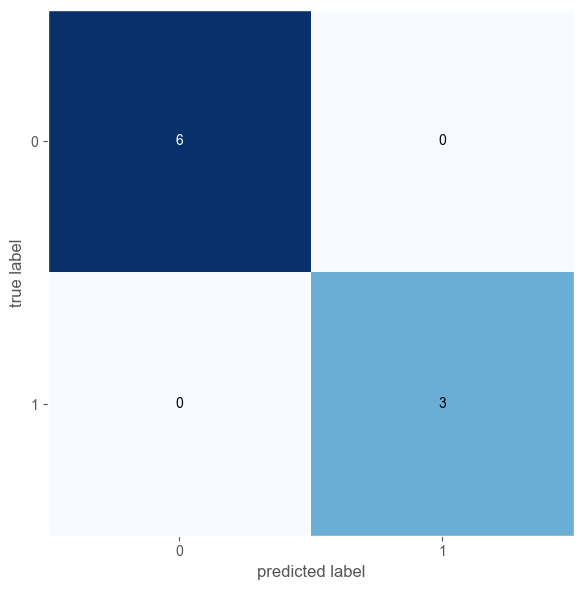

In [68]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento
Una vez entrenado el modelo, se pueden predecir nuevas observaciones.

# Fase de validación (Usando datos de Test)

In [69]:
print("Tests - Presición :", metrics.accuracy_score(y_test, prediccionTests))
print("Tests - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Tests - Presición : 0.5945945945945946
Tests - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.60      0.35      0.44        17

    accuracy                           0.59        37
   macro avg       0.60      0.58      0.56        37
weighted avg       0.60      0.59      0.57        37



### Matriz de Confusión

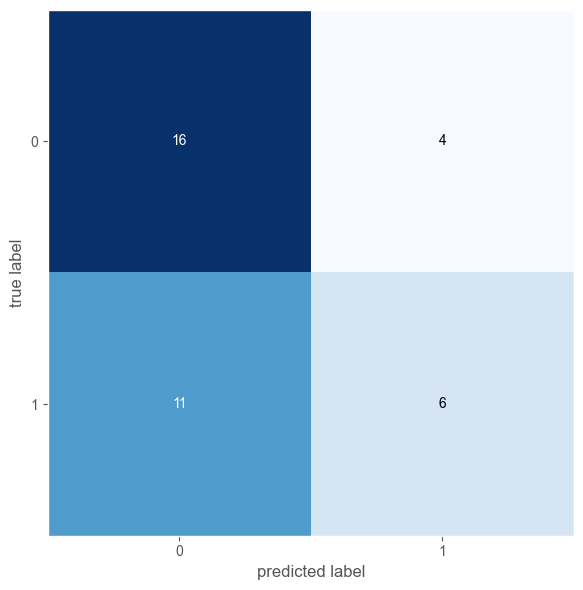

In [70]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

# 8-. Importancia de los predictores
Por experiencia previa y los gráficos producidos al principio, sabemos que algunas características no son útiles para nuestro problema de predicción. Para reducir la cantidad de funciones, lo que reducirá el tiempo de ejecución, con suerte sin reducir significativamente el rendimiento, podemos examinar la importancia de las funciones del Arbol de Decisión.

## Importancias de los predictores

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

**Predicciones probabilísticas**
==============================================================================
**Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha de pertenecer a cada una de las dos clases.**
**probabilidad: bool, por defecto=Falso**
Ya sea para habilitar las estimaciones de probabilidad. Esto debe habilitarse antes de llamar a fit, ralentizará ese método ya que utiliza internamente una validación cruzada de 5 veces y predict_probapuede ser inconsistente con predict. Lea más en la Guía del usuario .

In [79]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = svm.predict(X = X_test)
predicciones

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])